Import Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense

 Sample Dataset


In [4]:
data = """RNNs are good at sequence data
They remember past information
They are used in language modeling
RNNs can generate text"""


# Tokenization

In [5]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
total_words = len(tokenizer.word_index) + 1

# Create input sequences

In [7]:
input_sequences = []
for line in data.split("\n"):
 token_list = tokenizer.texts_to_sequences([line])[0]
 for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

# Pad sequences

In [8]:
max_seq_len = max([len(x) for x in input_sequences])
input_sequences = pad_sequences(input_sequences,
maxlen=max_seq_len, padding='pre')

# Split X, y

In [9]:
X, y = input_sequences[:,:-1], input_sequences[:,-1]
y = tf.keras.utils.to_categorical(y,
num_classes=total_words)

 Helper Function to Build Models

In [11]:
def build_model(cell_type="SimpleRNN", units=100):
 model = Sequential()
 model.add(Embedding(total_words, 10,
input_length=max_seq_len-1))
 if cell_type == "SimpleRNN":
   model.add(SimpleRNN(units))
 elif cell_type == "LSTM":
   model.add(LSTM(units))
 elif cell_type == "GRU":
   model.add(GRU(units))
 model.add(Dense(total_words, activation='softmax'))
 model.compile(loss='categorical_crossentropy',
optimizer='adam', metrics=['accuracy'])
 return model


 Train SimpleRNN, LSTM, GRU

In [12]:
models = {}
histories = {}
for cell in ["SimpleRNN", "LSTM", "GRU"]:
 print(f"\nTraining {cell} model...")
 model = build_model(cell)
 history = model.fit(X, y, epochs=200, verbose=0)
 models[cell] = model
 histories[cell] = history


Training SimpleRNN model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



Training LSTM model...

Training GRU model...


 Plot Loss & Accuracy Curves

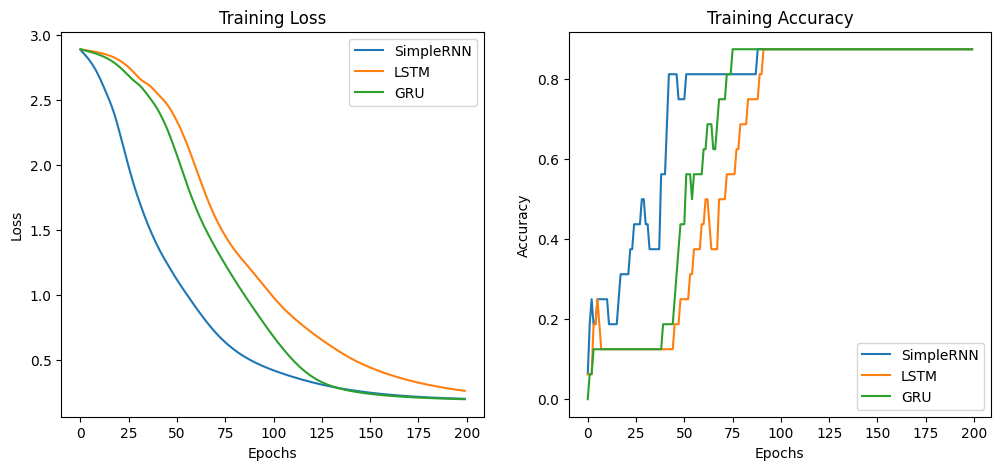

In [13]:
plt.figure(figsize=(12,5))
# Loss
plt.subplot(1,2,1)
for cell, hist in histories.items():
 plt.plot(hist.history['loss'], label=cell)
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
# Accuracy
plt.subplot(1,2,2)
for cell, hist in histories.items():
 plt.plot(hist.history['accuracy'], label=cell)
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

 Text Generation Function

In [14]:
def generate_text(model, seed_text, next_words=3):
 for _ in range(next_words):
   token_list = tokenizer.texts_to_sequences([seed_text])[0]
 token_list = pad_sequences([token_list],
maxlen=max_seq_len-1, padding='pre')
 predicted = np.argmax(model.predict(token_list,
verbose=0))
 output_word = ""
 for word, index in tokenizer.word_index.items():
   if index == predicted:
     output_word = word
     break
 seed_text += " " + output_word
 return seed_text

 Compare Text Predictions


In [15]:
seed = "RNNs are"
for cell, model in models.items():
 print(f"{cell} prediction: {generate_text(model, seed,3)}")


SimpleRNN prediction: RNNs are good
LSTM prediction: RNNs are good
GRU prediction: RNNs are good
